In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Data Cleaner

def CleanData(df):
  df['max_cycle'] = df['id'].map(df.groupby('id')['cycle'].max())
  df['remaining_cycle'] = df['max_cycle'] - df['cycle']
  df.drop('max_cycle', axis=1, inplace=True)

  return df


In [4]:
# Bin Creator

def CreateBin(df):
  max_val = df['remaining_cycle'].max()
  upper = max(max_val, 151)

  df['remaining_cycle_bin'] = pd.cut(
      df['remaining_cycle'],
      bins=[-1, 50, 150, upper],
      labels=[0, 1, 2]
  )
  df.drop('remaining_cycle', axis=1, inplace=True)

  return df

In [5]:
# Correlation Matrix

def CorrelationMatrix(df):

  corr_matrix = df.corr()

  plt.figure(figsize=(24,24))
  sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
  plt.title("Correlation matrix of operational settings and sensors")
  plt.show()

In [6]:
column_names = ['id', 'cycle',
                'os1', 'os2', 'os3'] + \
               [f's{i}' for i in range(1, 22)]

In [7]:
#Select Max Cycle row

def SelectMaxCycleRow(df):
  df = df.loc[df.groupby('id')['cycle'].idxmax()].reset_index(drop=True)

  return df

In [8]:
# RLU and Test Dataset Mapping

def RluAndTest(df, rlu):
    rlu = rlu.reset_index()
    rlu.rename(columns={'index': 'id'}, inplace=True)
    rlu['id'] = rlu['id'] + 1

    df['remaining_cycle'] = df['id'].map(rlu.set_index('id')['remaining_cycle'])

    return df


# FD001

In [323]:
# Remove columns

def RemoveCols(df):
  df = df.drop(columns=['s1', 'os2', 'os1', 'os3', 's5', 's10', 's18', 's16', 's19', 'id'])

  return df

In [324]:
dfFD001 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/train_FD001.txt', sep='\s+', header=None, names=column_names)

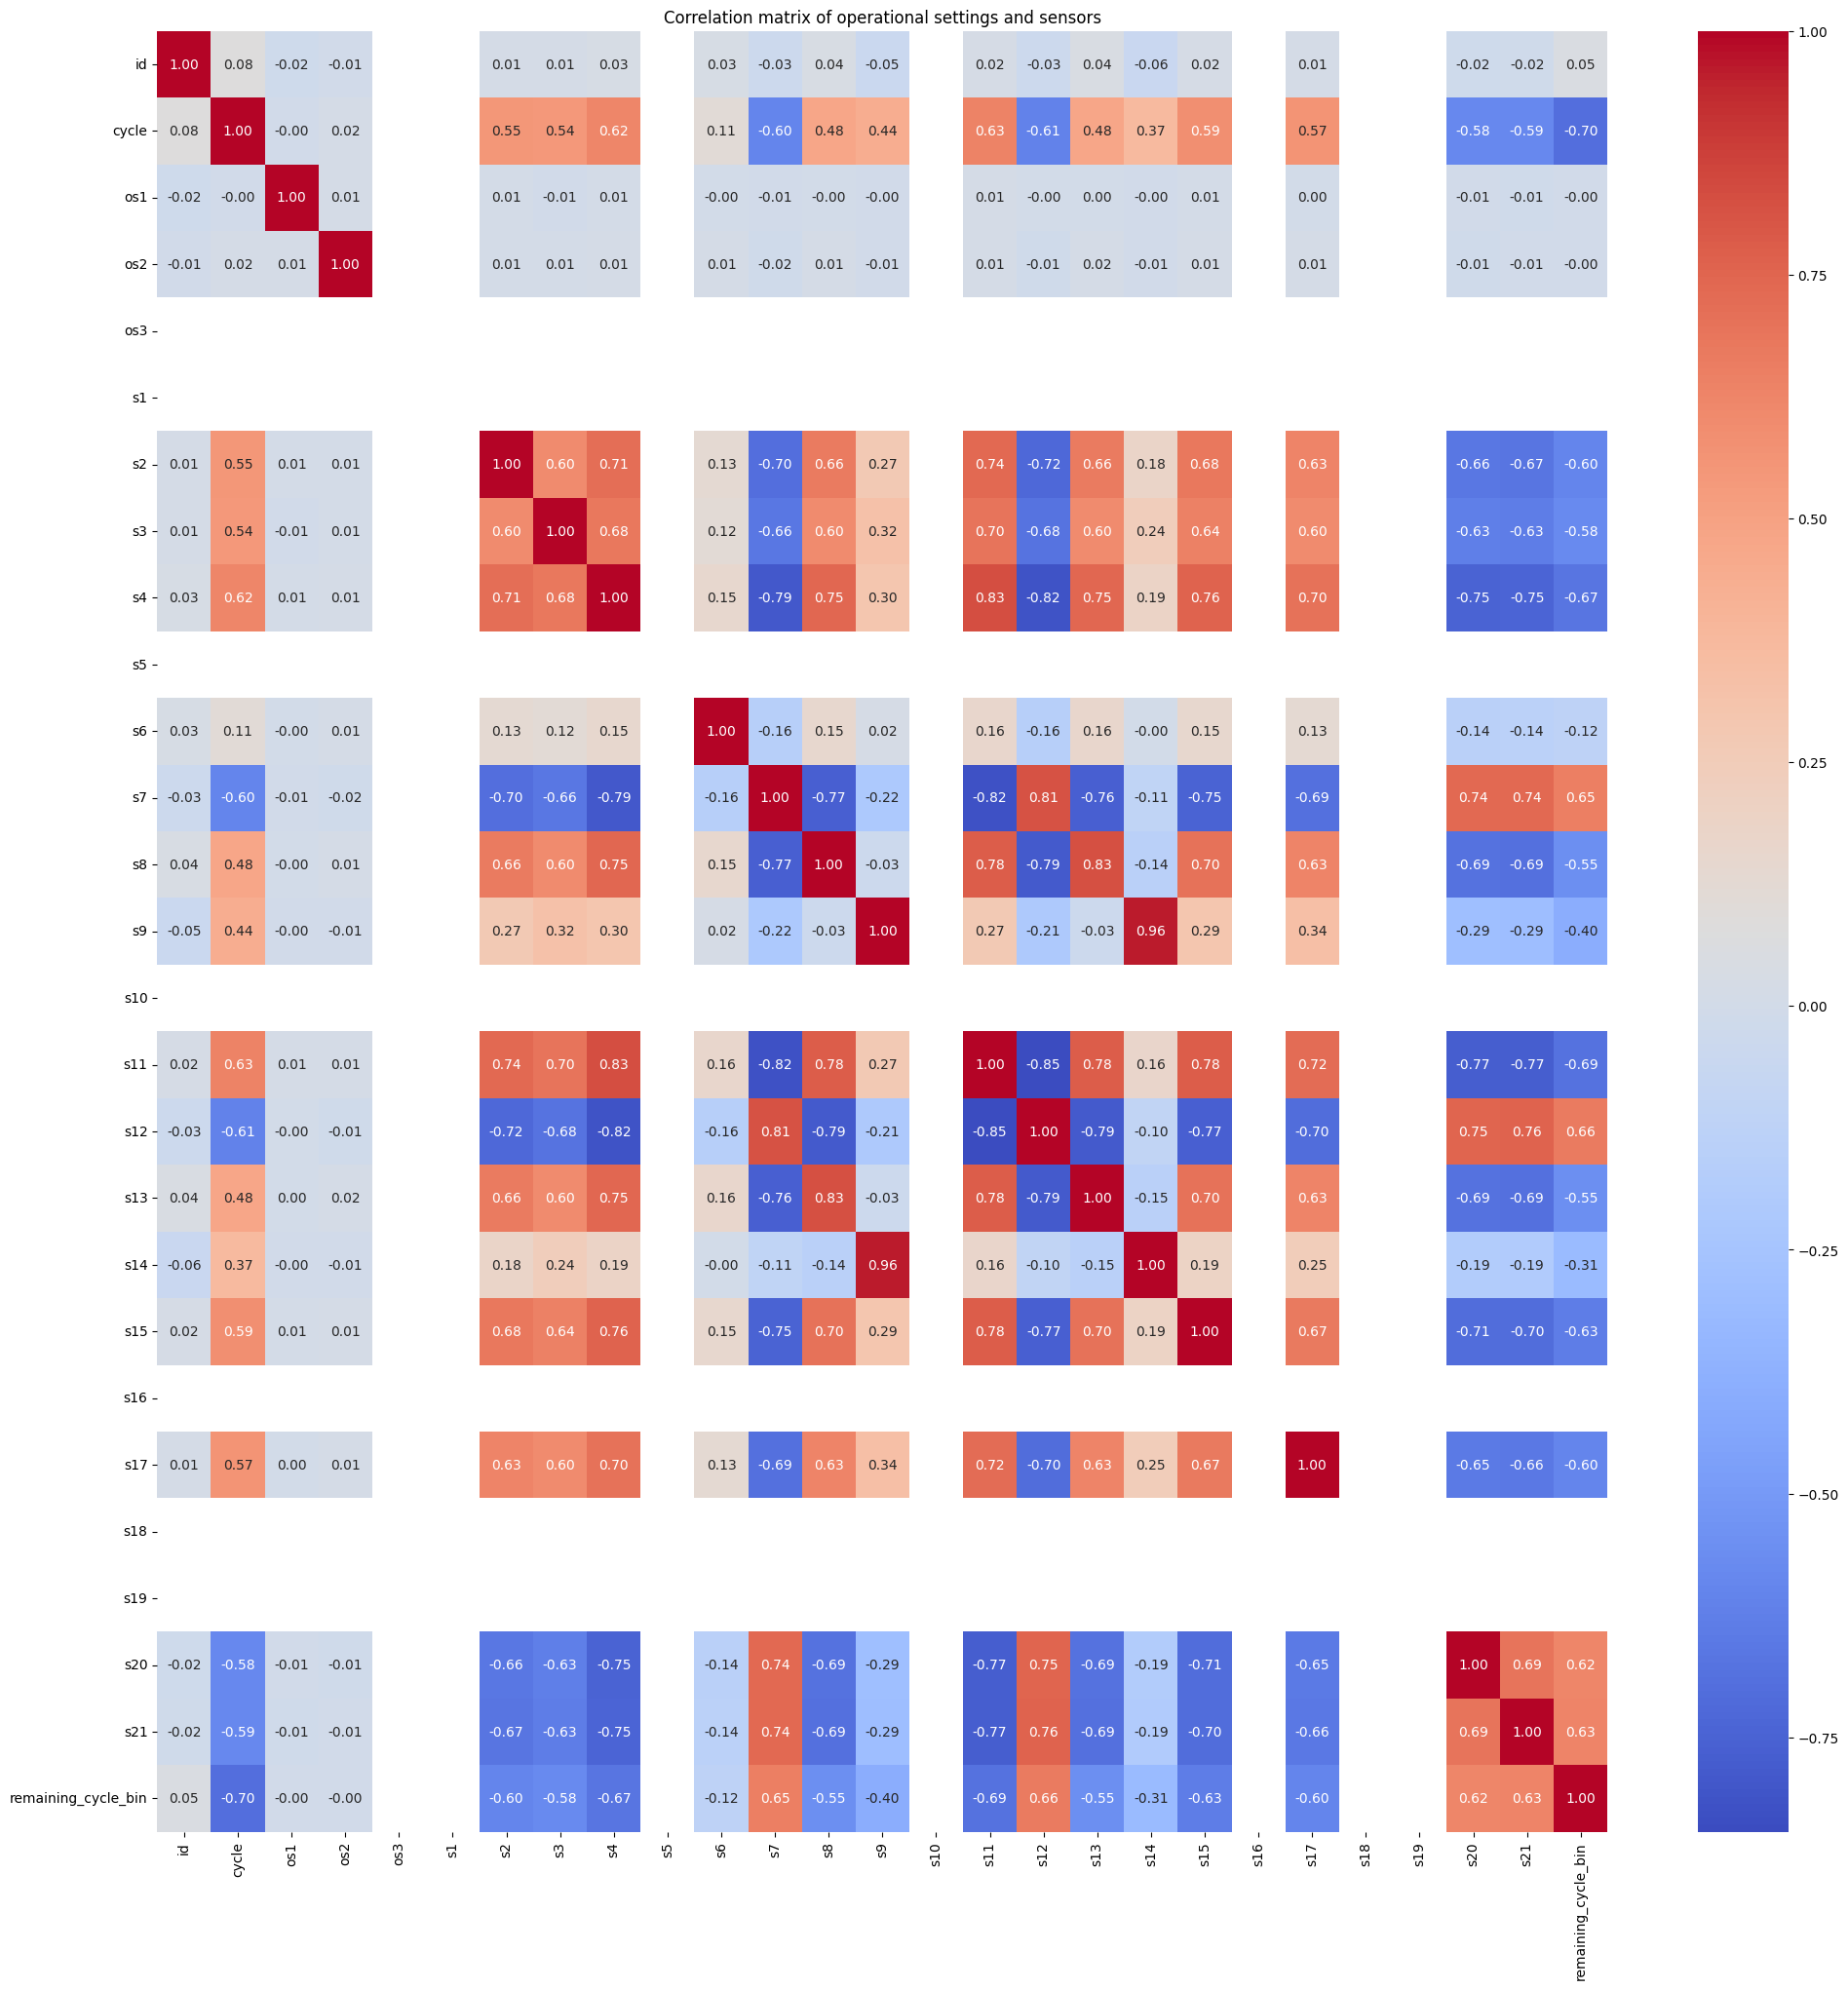

In [325]:
dfFD001 = CleanData(dfFD001)
dfFD001 = CreateBin(dfFD001)
CorrelationMatrix(dfFD001)

In [326]:
dfFD001 = RemoveCols(dfFD001)

In [327]:
X = dfFD001.drop(columns=['remaining_cycle_bin'])  # features
y = dfFD001['remaining_cycle_bin']                 # target labels

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)

rf_clf.fit(X, y)

RandomForestClassifier(max_depth=15, n_estimators=500, random_state=42)

In [328]:
dfFD001_test = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/test_FD001.txt', sep='\s+', header=None, names=column_names)

In [329]:
dfFD001_test

,id,cycle,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [330]:
col_Name = ['remaining_cycle']
RUL_FD001 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/RUL_FD001.txt', header=None, names=col_Name)

In [331]:
dfFD001_test = RluAndTest(dfFD001_test, RUL_FD001)
dfFD001_test = SelectMaxCycleRow(dfFD001_test)
dfFD001_test = RemoveCols(dfFD001_test)

In [332]:
dfFD001_test

,cycle,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,remaining_cycle
0,31,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,112
1,49,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,98
2,126,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,69
3,106,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,82
4,98,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,642.30,1590.88,1397.94,21.61,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606,137
96,134,642.59,1582.96,1410.92,21.61,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953,82
97,121,642.68,1599.51,1415.47,21.61,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608,59
98,97,642.00,1585.03,1397.98,21.61,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595,117


In [333]:
dfFD001_test = CreateBin(dfFD001_test)

In [334]:
dfFD001_test

,cycle,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,remaining_cycle_bin
0,31,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,1
1,49,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,1
2,126,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,1
3,106,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,1
4,98,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,642.30,1590.88,1397.94,21.61,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606,1
96,134,642.59,1582.96,1410.92,21.61,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953,1
97,121,642.68,1599.51,1415.47,21.61,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608,1
98,97,642.00,1585.03,1397.98,21.61,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595,1


In [335]:
X = dfFD001_test.drop(columns=['remaining_cycle_bin'])  # features
y_actual = dfFD001_test['remaining_cycle_bin']                 # target labels

y_pred = rf_clf.predict(X)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("\nClassification Report:\n", classification_report(y_actual, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_actual, y_pred))

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.92      0.87      0.89        67
           2       0.00      0.00      0.00         0

    accuracy                           0.86       100
   macro avg       0.62      0.57      0.59       100
weighted avg       0.92      0.86      0.89       100


Confusion Matrix:
 [[28  5  0]
 [ 2 58  7]
 [ 0  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [336]:
probs = rf_clf.predict_proba(X)

# Uncertainty = 1 - max probability for each sample
uncertainty = 1 - np.max(probs, axis=1)

# Add to dataframe if needed
results = pd.DataFrame({
    'predicted_class': rf_clf.predict(X),
    'uncertainty': uncertainty
})

In [337]:
class_uncertainty = results.groupby('predicted_class')['uncertainty'].mean()
print(class_uncertainty)

predicted_class
0    0.132353
1    0.272821
2    0.393054
Name: uncertainty, dtype: float64


# FD003


In [338]:
dfFD003 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/train_FD003.txt', sep='\s+', header=None, names=column_names)

In [339]:
# Remove columns

def RemoveColsFD003(df):
  df = df.drop(columns=['os1', 'os2', 'os3', 's1', 's5', 's16', 's18', 's19', 's20', 's21', 's15'])

  return df

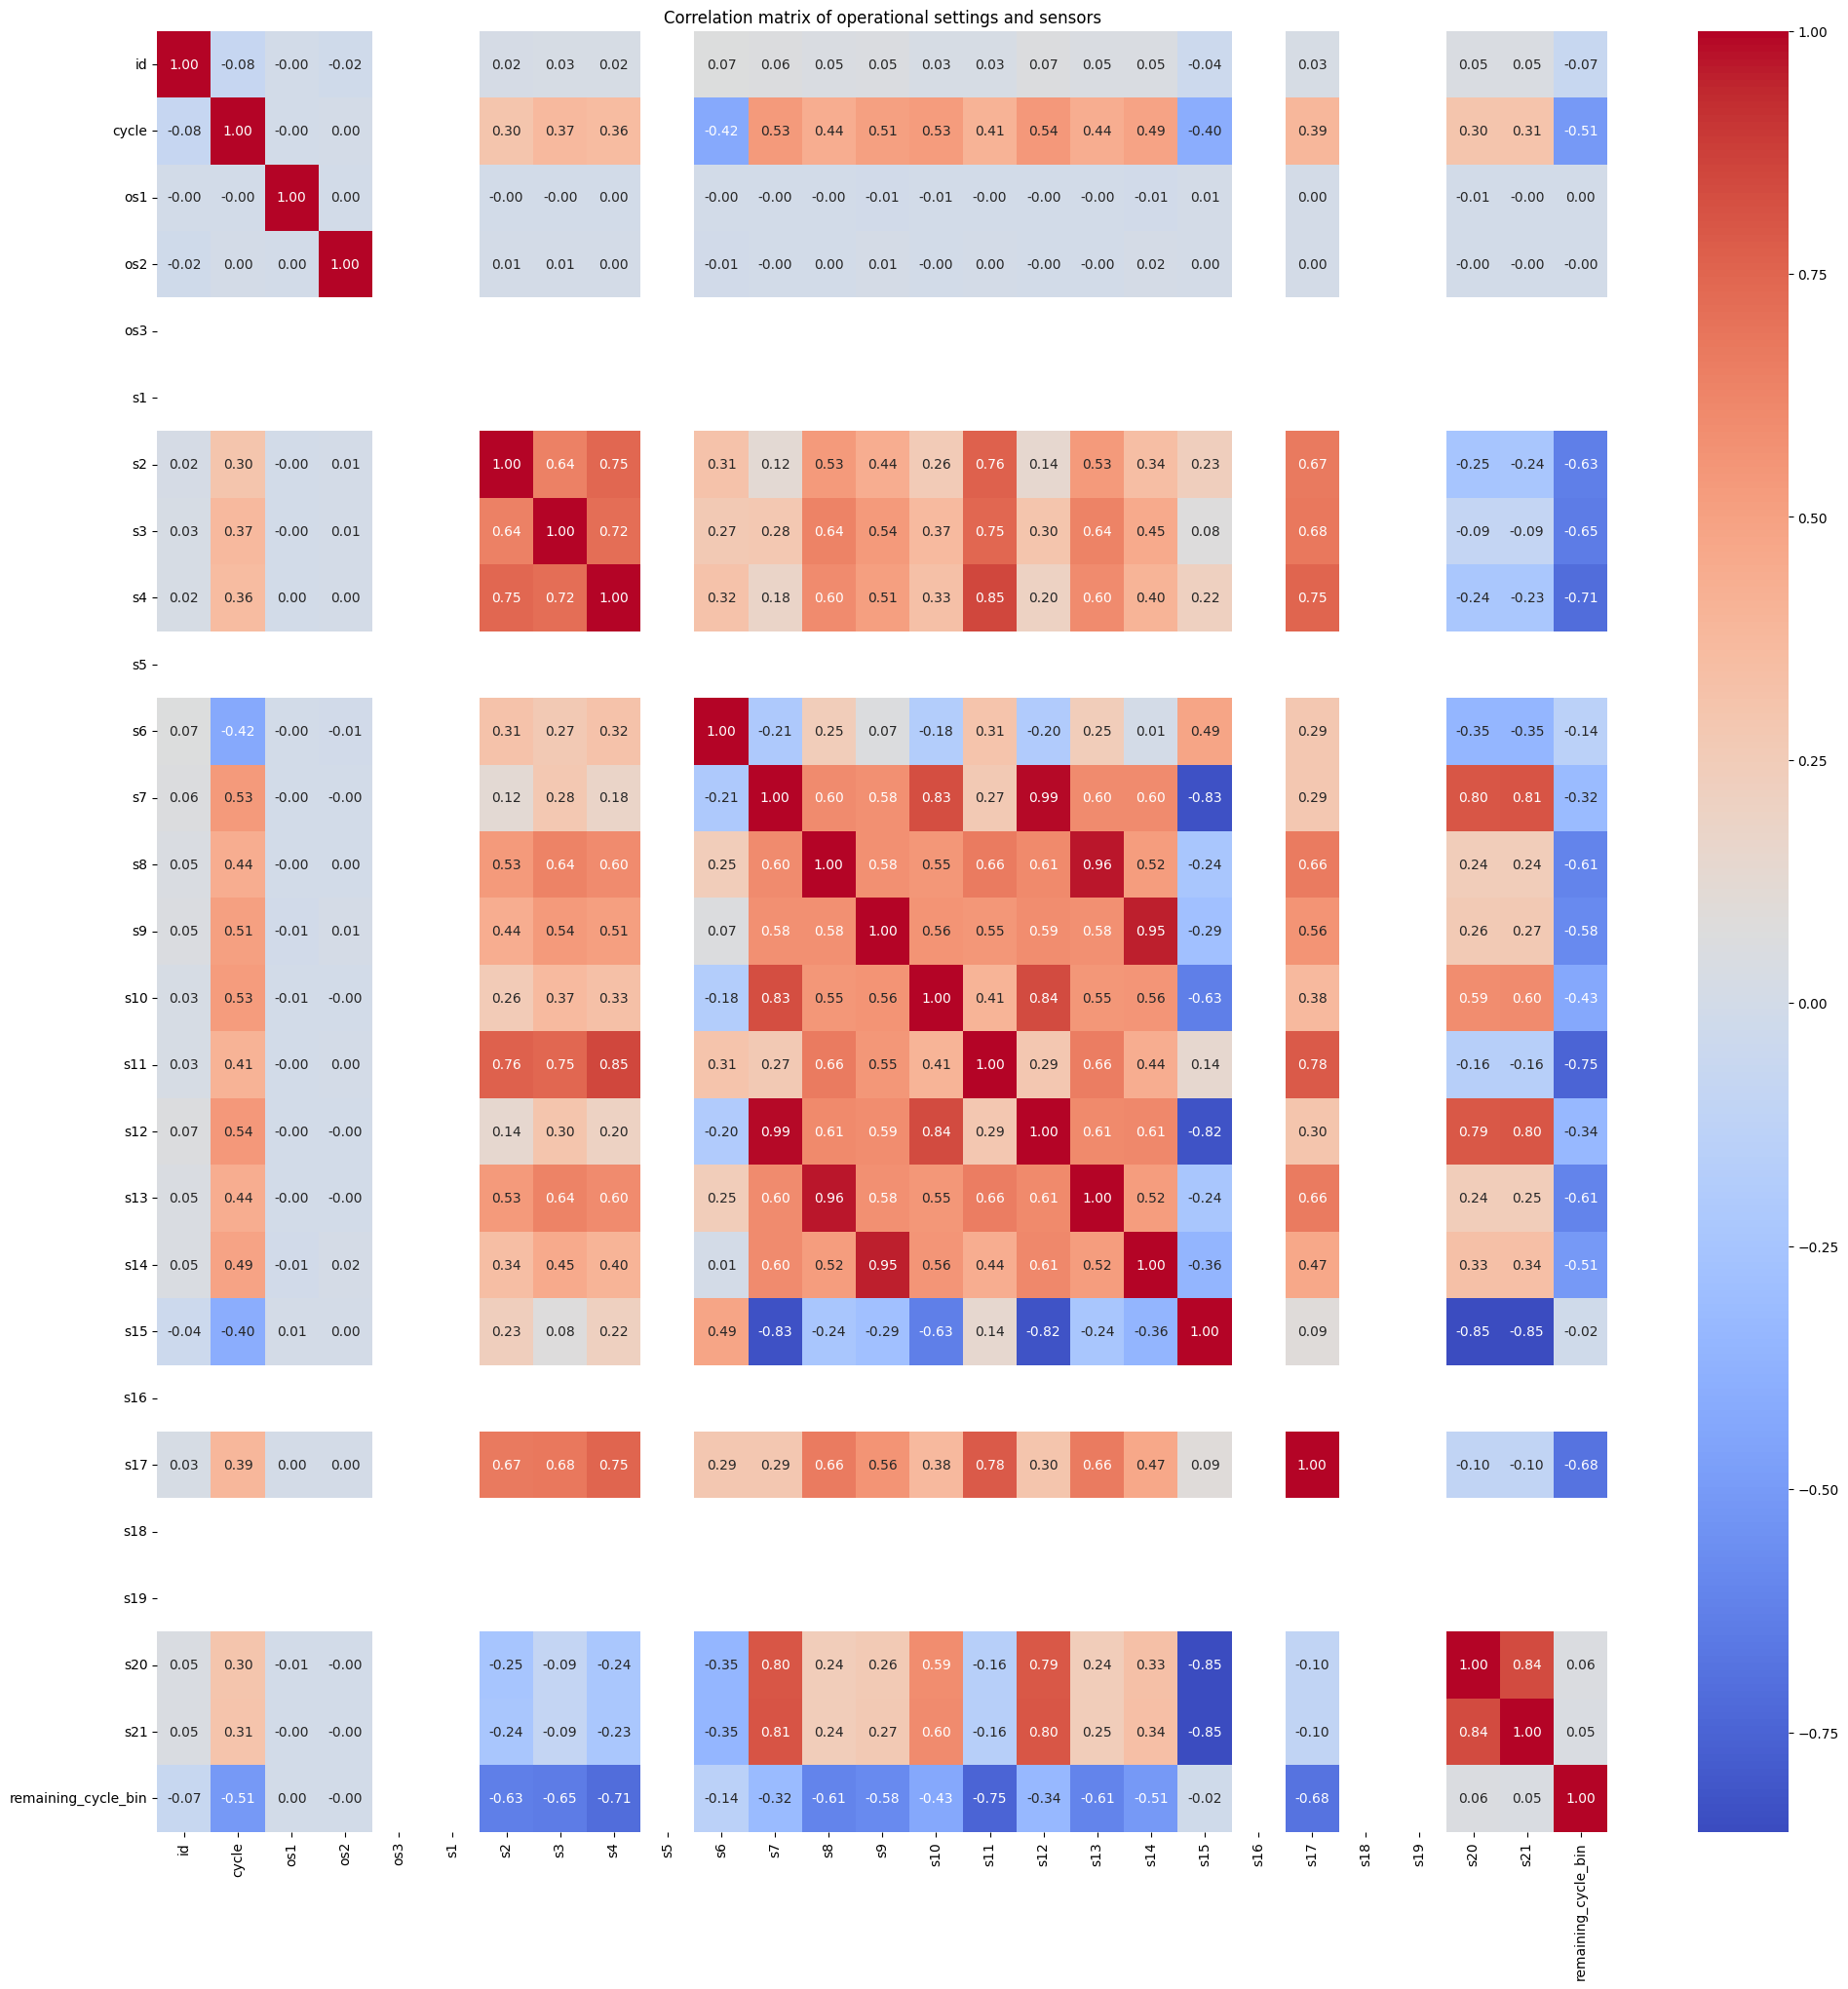

In [340]:
dfFD003 = CleanData(dfFD003)
dfFD003 = CreateBin(dfFD003)
CorrelationMatrix(dfFD003)

In [341]:
dfFD003 = RemoveColsFD003(dfFD003)

In [342]:
X = dfFD003.drop(columns=['remaining_cycle_bin'])  # features
y = dfFD003['remaining_cycle_bin']                 # target labels

rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=42)

rf_clf.fit(X, y)

RandomForestClassifier(max_depth=30, n_estimators=1000, random_state=42)

In [343]:
dfFD003_test = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/test_FD003.txt', sep='\s+', header=None, names=column_names)

In [344]:
dfFD003_test

,id,cycle,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687


In [345]:
col_Name = ['remaining_cycle']
RUL_FD003 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/RUL_FD003.txt', header=None, names=col_Name)

In [346]:
dfFD003_test = RluAndTest(dfFD003_test, RUL_FD003)
dfFD003_test = SelectMaxCycleRow(dfFD003_test)
dfFD003_test = RemoveColsFD003(dfFD003_test)

In [347]:
dfFD003_test

,id,cycle,s2,s3,s4,s6,s7,s8,s9,s10,s11,s12,s13,s14,s17,remaining_cycle
0,1,233,642.59,1592.40,1409.87,21.58,560.53,2388.22,9085.50,1.31,47.53,528.05,2388.23,8158.77,393,44
1,2,124,642.56,1587.42,1409.69,21.61,553.33,2388.18,9050.97,1.30,47.71,520.90,2388.17,8128.04,392,51
2,3,234,642.75,1591.93,1417.66,21.60,563.61,2388.31,9091.69,1.31,47.68,531.36,2388.33,8173.56,395,27
3,4,68,642.28,1584.68,1406.56,21.61,552.75,2388.07,9048.23,1.30,47.26,521.27,2388.09,8133.78,392,120
4,5,138,642.15,1580.59,1397.26,21.58,553.82,2387.96,9050.89,1.30,47.09,521.74,2387.96,8132.51,390,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,358,642.89,1592.93,1409.28,21.60,560.47,2388.21,9073.16,1.31,47.60,527.72,2388.16,8153.13,392,113
96,97,95,642.32,1585.11,1390.01,21.61,554.60,2388.04,9052.78,1.30,47.05,522.73,2387.98,8138.86,392,123
97,98,182,643.35,1592.18,1426.93,21.61,552.34,2388.20,9116.53,1.30,47.83,520.87,2388.10,8189.23,396,17
98,99,289,642.78,1597.57,1419.47,21.59,566.57,2388.45,9105.74,1.31,48.09,534.03,2388.47,8185.00,397,8


In [348]:
dfFD003_test = CreateBin(dfFD003_test)

In [349]:
dfFD003_test

,id,cycle,s2,s3,s4,s6,s7,s8,s9,s10,s11,s12,s13,s14,s17,remaining_cycle_bin
0,1,233,642.59,1592.40,1409.87,21.58,560.53,2388.22,9085.50,1.31,47.53,528.05,2388.23,8158.77,393,0
1,2,124,642.56,1587.42,1409.69,21.61,553.33,2388.18,9050.97,1.30,47.71,520.90,2388.17,8128.04,392,1
2,3,234,642.75,1591.93,1417.66,21.60,563.61,2388.31,9091.69,1.31,47.68,531.36,2388.33,8173.56,395,0
3,4,68,642.28,1584.68,1406.56,21.61,552.75,2388.07,9048.23,1.30,47.26,521.27,2388.09,8133.78,392,1
4,5,138,642.15,1580.59,1397.26,21.58,553.82,2387.96,9050.89,1.30,47.09,521.74,2387.96,8132.51,390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,358,642.89,1592.93,1409.28,21.60,560.47,2388.21,9073.16,1.31,47.60,527.72,2388.16,8153.13,392,1
96,97,95,642.32,1585.11,1390.01,21.61,554.60,2388.04,9052.78,1.30,47.05,522.73,2387.98,8138.86,392,1
97,98,182,643.35,1592.18,1426.93,21.61,552.34,2388.20,9116.53,1.30,47.83,520.87,2388.10,8189.23,396,0
98,99,289,642.78,1597.57,1419.47,21.59,566.57,2388.45,9105.74,1.31,48.09,534.03,2388.47,8185.00,397,0


In [350]:
X = dfFD003_test.drop(columns=['remaining_cycle_bin'])  # features
y_actual = dfFD003_test['remaining_cycle_bin']                 # target labels


y_pred = rf_clf.predict(X)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("\nClassification Report:\n", classification_report(y_actual, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_actual, y_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.93      0.77      0.85        71
           2       0.00      0.00      0.00         0

    accuracy                           0.80       100
   macro avg       0.61      0.55      0.57       100
weighted avg       0.92      0.80      0.86       100


Confusion Matrix:
 [[25  4  0]
 [ 3 55 13]
 [ 0  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [351]:
probs = rf_clf.predict_proba(X)

# Uncertainty = 1 - max probability for each sample
uncertainty = 1 - np.max(probs, axis=1)

# Add to dataframe if needed
results = pd.DataFrame({
    'predicted_class': rf_clf.predict(X),
    'uncertainty': uncertainty
})

In [352]:
class_uncertainty = results.groupby('predicted_class')['uncertainty'].mean()
print(class_uncertainty)

predicted_class
0    0.110286
1    0.243087
2    0.333111
Name: uncertainty, dtype: float64


# FD002


In [24]:
dfFD002 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/train_FD002.txt', sep='\s+', header=None, names=column_names)

In [25]:
# Remove columns

def RemoveColsFD002(df):
  df = df.drop(columns=['os1', 'os2', 'os3', 's1', 's5', 's6', 's7', 's8', 's10', 's12', 's13', 's18', 's19'])

  return df

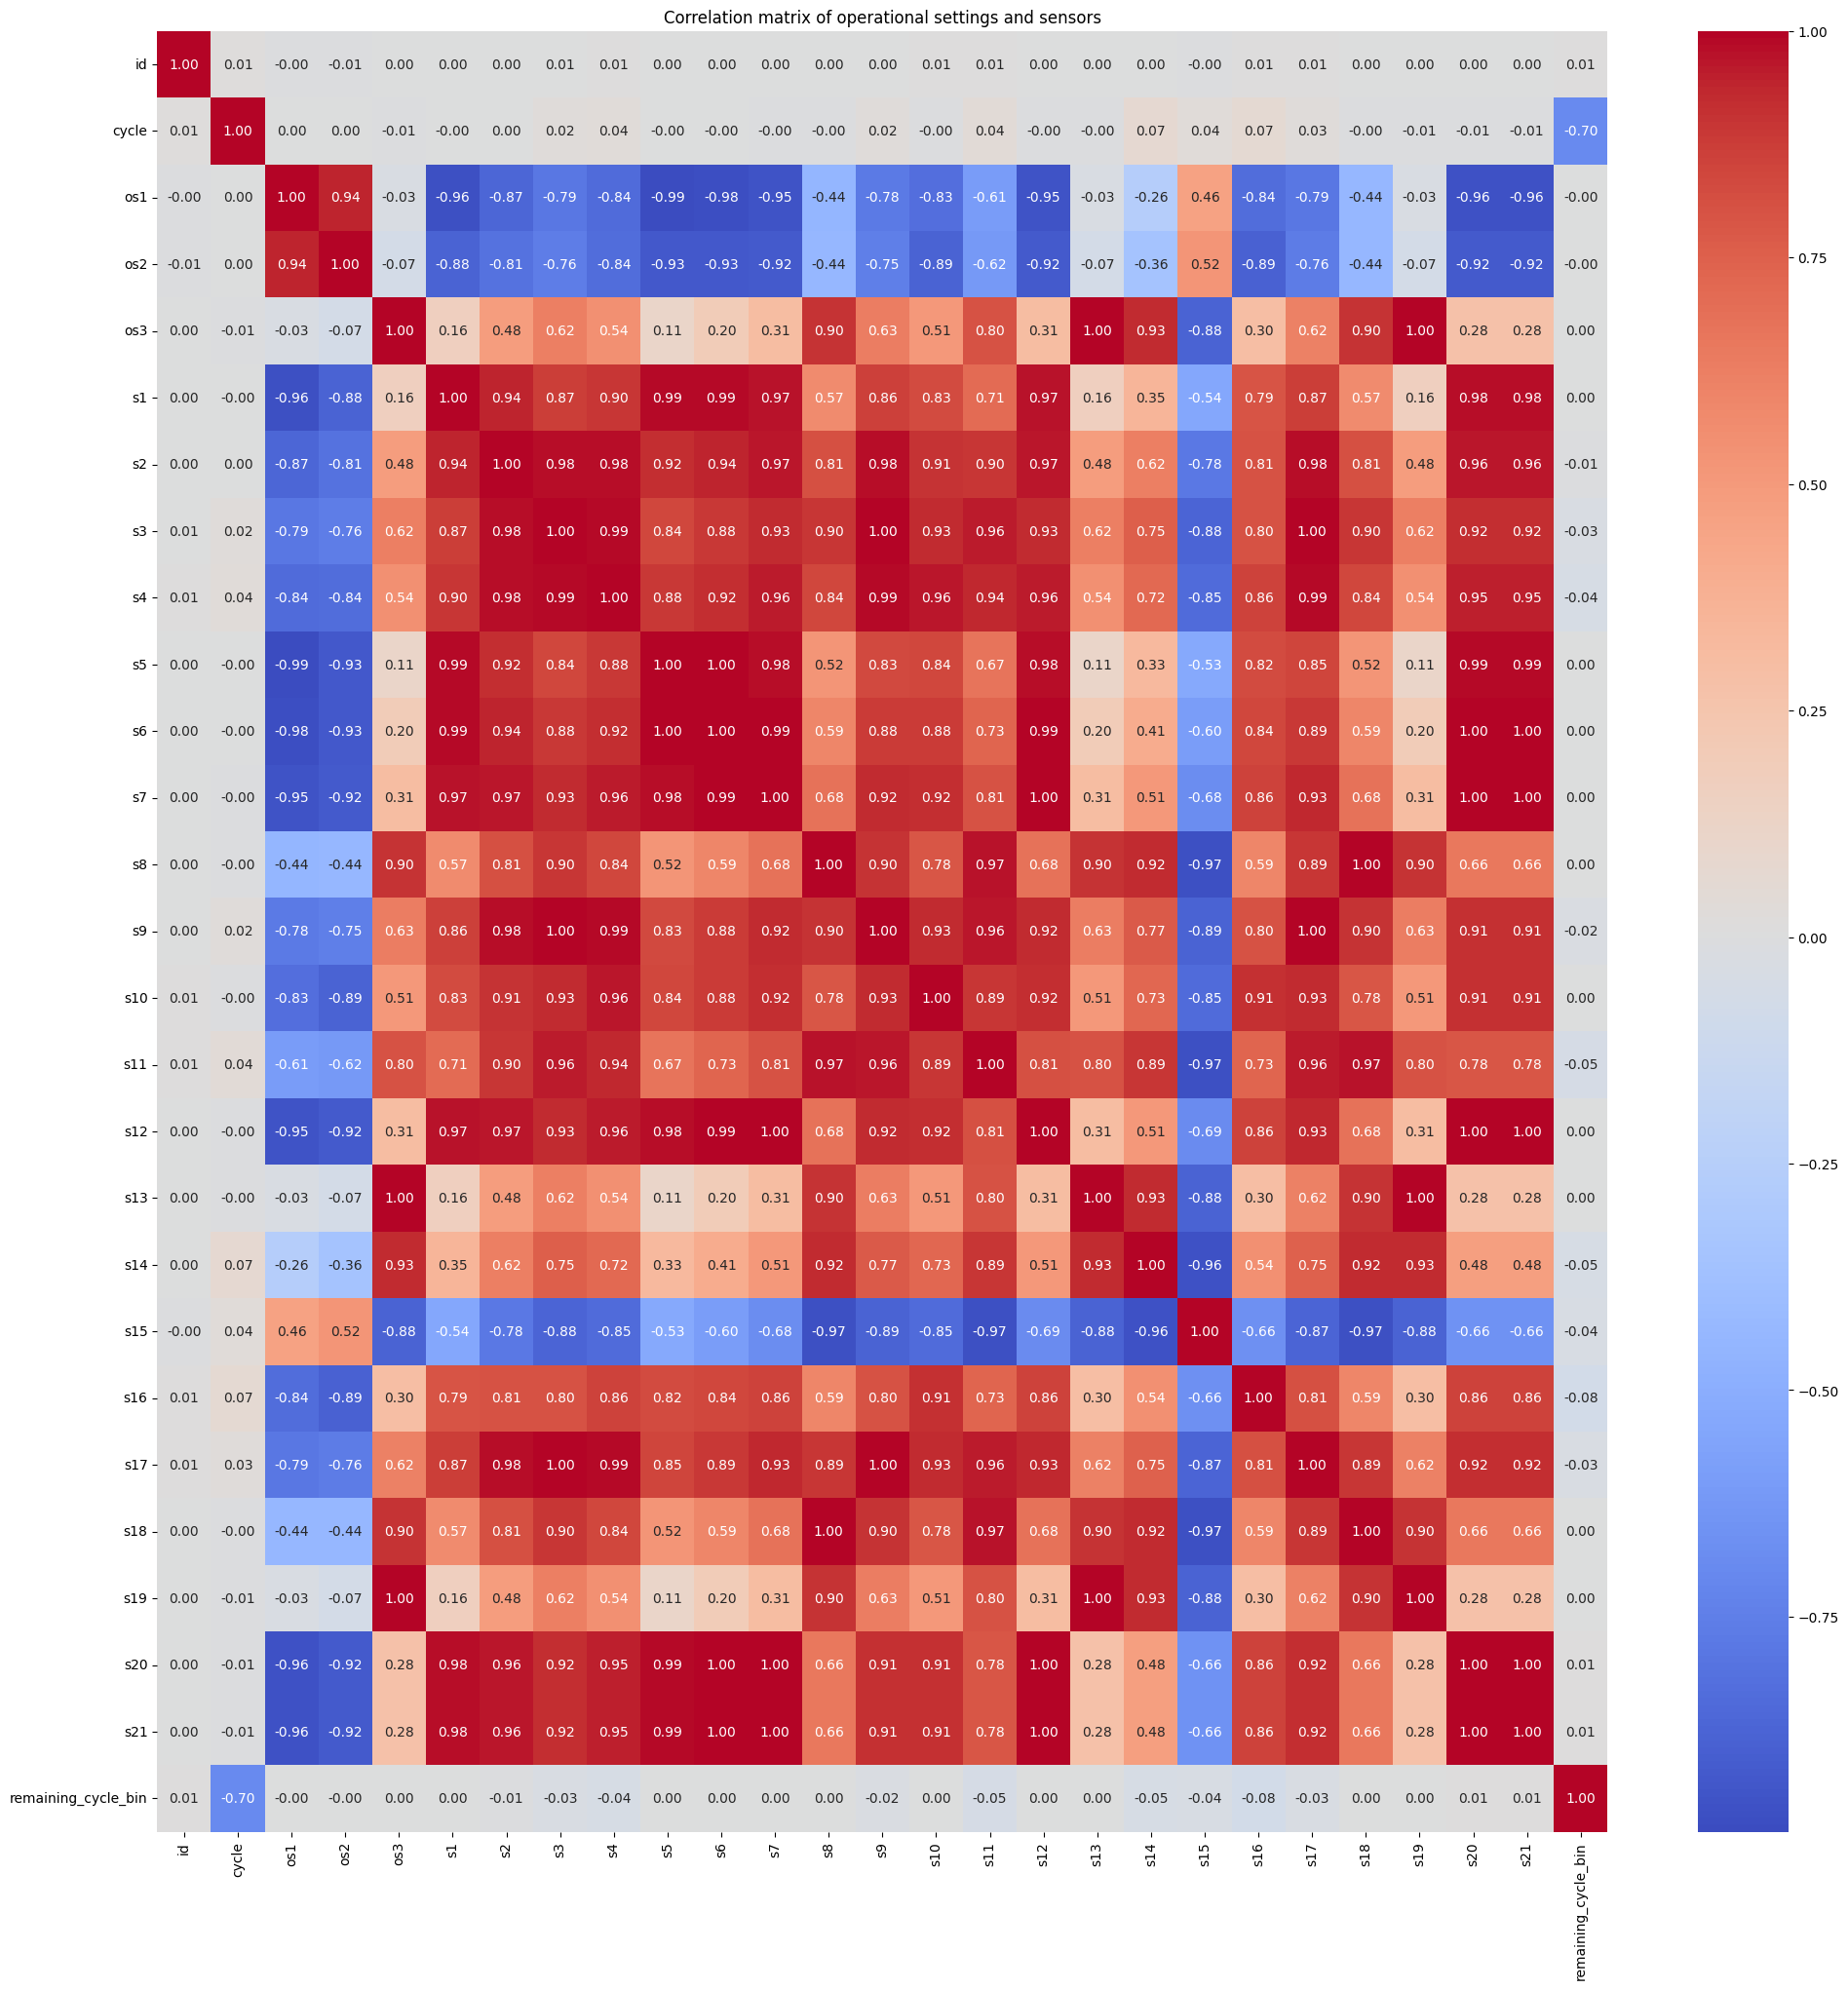

In [26]:
dfFD002 = CleanData(dfFD002)
dfFD002 = CreateBin(dfFD002)
CorrelationMatrix(dfFD002)

In [27]:
dfFD002 = RemoveColsFD002(dfFD002)

In [28]:
X = dfFD002.drop(columns=['remaining_cycle_bin'])  # features
y = dfFD002['remaining_cycle_bin']                 # target labels

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)

rf_clf.fit(X, y)

RandomForestClassifier(max_depth=30, n_estimators=800, random_state=42)

In [29]:
dfFD002_test = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/test_FD002.txt', sep='\s+', header=None, names=column_names)

In [30]:
dfFD002_test

,id,cycle,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [31]:
col_Name = ['remaining_cycle']
RUL_FD002 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/RUL_FD002.txt', header=None, names=col_Name)

In [32]:
dfFD002_test = RluAndTest(dfFD002_test, RUL_FD002)
dfFD002_test = SelectMaxCycleRow(dfFD002_test)
dfFD002_test = RemoveColsFD002(dfFD002_test)

In [33]:
dfFD002_test

,id,cycle,s2,s3,s4,s9,s11,s14,s15,s16,s17,s20,s21,remaining_cycle
0,1,258,605.42,1515.00,1325.07,8826.49,45.89,8167.06,8.7456,0.03,371,28.30,17.0934,18
1,2,55,642.67,1591.67,1418.17,9056.17,47.43,8138.12,8.4248,0.03,393,38.82,23.3463,79
2,3,165,555.86,1370.62,1135.59,8353.33,41.91,8071.23,9.3094,0.02,332,14.75,8.9589,106
3,4,86,607.99,1487.94,1257.49,8733.15,44.48,8062.39,9.2349,0.02,365,24.22,14.6814,110
4,5,148,550.81,1358.95,1140.34,8391.57,42.43,8140.94,9.3964,0.02,333,10.34,6.3601,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,255,150,549.07,1353.72,1123.42,8325.49,42.09,8089.54,9.3592,0.02,331,10.48,6.4609,122
255,256,59,604.76,1501.00,1308.18,8775.48,45.56,8128.82,8.6462,0.03,369,28.52,17.2240,191
256,257,199,555.76,1369.89,1128.03,8371.82,42.13,8087.96,9.3123,0.02,333,14.98,8.8467,56
257,258,98,641.89,1590.52,1398.15,9060.38,47.40,8144.20,8.4176,0.03,391,39.00,23.4591,131


In [34]:
dfFD002_test = CreateBin(dfFD002_test)

In [35]:
dfFD002_test

,id,cycle,s2,s3,s4,s9,s11,s14,s15,s16,s17,s20,s21,remaining_cycle_bin
0,1,258,605.42,1515.00,1325.07,8826.49,45.89,8167.06,8.7456,0.03,371,28.30,17.0934,0
1,2,55,642.67,1591.67,1418.17,9056.17,47.43,8138.12,8.4248,0.03,393,38.82,23.3463,1
2,3,165,555.86,1370.62,1135.59,8353.33,41.91,8071.23,9.3094,0.02,332,14.75,8.9589,1
3,4,86,607.99,1487.94,1257.49,8733.15,44.48,8062.39,9.2349,0.02,365,24.22,14.6814,1
4,5,148,550.81,1358.95,1140.34,8391.57,42.43,8140.94,9.3964,0.02,333,10.34,6.3601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,255,150,549.07,1353.72,1123.42,8325.49,42.09,8089.54,9.3592,0.02,331,10.48,6.4609,1
255,256,59,604.76,1501.00,1308.18,8775.48,45.56,8128.82,8.6462,0.03,369,28.52,17.2240,2
256,257,199,555.76,1369.89,1128.03,8371.82,42.13,8087.96,9.3123,0.02,333,14.98,8.8467,1
257,258,98,641.89,1590.52,1398.15,9060.38,47.40,8144.20,8.4176,0.03,391,39.00,23.4591,1


In [36]:
X = dfFD002_test.drop(columns=['remaining_cycle_bin'])  # features
y_actual = dfFD002_test['remaining_cycle_bin']                 # target labels


y_pred = rf_clf.predict(X)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("\nClassification Report:\n", classification_report(y_actual, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_actual, y_pred))

Accuracy: 0.749034749034749

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        88
           1       0.74      0.81      0.77       135
           2       0.32      0.19      0.24        36

    accuracy                           0.75       259
   macro avg       0.64      0.63      0.63       259
weighted avg       0.73      0.75      0.73       259


Confusion Matrix:
 [[ 78  10   0]
 [ 11 109  15]
 [  0  29   7]]


In [37]:
probs = rf_clf.predict_proba(X)

# Uncertainty = 1 - max probability for each sample
uncertainty = 1 - np.max(probs, axis=1)

# Add to dataframe if needed
results = pd.DataFrame({
    'predicted_class': rf_clf.predict(X),
    'uncertainty': uncertainty
})

In [38]:
class_uncertainty = results.groupby('predicted_class')['uncertainty'].mean()
print(class_uncertainty)

predicted_class
0    0.127885
1    0.285102
2    0.333976
Name: uncertainty, dtype: float64
